In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def relu(x):
    return np.maximum(0,x)

In [4]:
def deriv_relu(x):
    der=list()
    der.clear()
    for val in x:
        if val>0:
            der.append(1)
        else:
            der.append(0)
    return der

In [5]:
def initialize(x):
    np.random.seed(12345)
    w1=2*np.random.random((len(x.columns), 1))-1
    bias=2*np.random.random()-1
   # w2=2*np.random.random((neurons, 1))-1
    return w1, bias

In [6]:
def forward_prop(w1, bias, x):
    x=x.reshape(13,1)
    z=np.dot(w1.T,x)+bias
    out=relu(z)
    return z, out
    

In [7]:
def back_prop(w1, bias, x, y, z, out, lr):
    x=x.reshape(13,1)
    err=2*(np.subtract(out.sum(axis=0),y))
    dummy=np.array(deriv_relu(z)).reshape(1,1)
    dc_dw=lr*np.dot(x,dummy)*err
    w1=np.subtract(w1,dc_dw)
    dc_db=lr*err
    bias-=dc_db
    return w1, bias

In [8]:
pd.set_option("display.max_rows", None,
             "display.max_columns", None)

In [9]:
PATH="/Users/ecemdenizbabaoglan/Desktop/TOBBETU/yap470/housing.csv" #Buraya housing.csv dosyasının bilgisayardaki yolu girilmelidir

In [10]:
columns=("CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV")

In [11]:
ds=pd.read_csv(PATH, sep='\s+', engine='python', names=columns)

In [12]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
target=ds.loc[:,'MEDV'].copy()
data=ds.drop('MEDV', axis=1).copy()

In [14]:
w1, bias=initialize(data)

In [15]:
data_normalized = ((data - data.mean()) / data.std(ddof=0)).to_numpy()
target=target.to_numpy()

In [16]:
cutoff = int(len(data) * 0.8)
x_train, x_test = data_normalized[:cutoff], data_normalized[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [17]:
#for best results without bias: Epochs:2000, lr:0.001
#for best results with bias: Epochs:2000, lr:0.01
#edit: bias ekliyken lr sabit birakilip epoch 500'e kadar düşürüldü, aynı başarım alındı.
#edit2: epoch 100'e düşürüldüğünde training başarımı azaldı (muhtemel overfit engellendi), test başarısı yaklaşık aynı elde edildi

In [18]:
epochs=100;

In [19]:
lr=0.0001

In [20]:
train_loss_epoch=list()
test_loss_epoch=list()

In [21]:
for e in range(epochs):
    loss_train=0
    loss_test=0
    for i in range(len(y_train)):   
        z, out = (forward_prop(w1, bias, x_train[i]))
       # predicted[i]=output[i].sum(axis=0)
        w1, bias=back_prop(w1, bias, x_train[i], y_train[i], z, out, lr)
        loss_train+=np.square(y_train[i]-(out.sum(axis=0)))
        
    train_loss_epoch.append(loss_train/(len(y_train)))   
    
    for i in range(len(y_test)):
        z_test, out_test=forward_prop(w1,bias,x_test[i])
        loss_test+=np.square(y_test[i]-(out_test.sum(axis=0)))

    test_loss_epoch.append(loss_test/(len(y_test)))

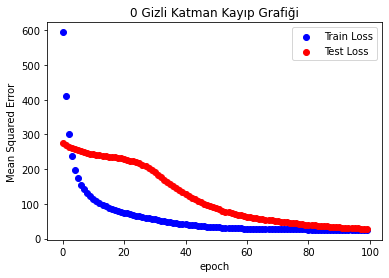

In [22]:
plt.scatter(range(epochs),train_loss_epoch, color='blue',label='Train Loss')
plt.scatter(range(epochs),test_loss_epoch, color='red', label='Test Loss')
plt.xlabel("epoch")
plt.ylabel("Mean Squared Error")
plt.title("0 Gizli Katman Kayıp Grafiği")
plt.legend(loc="upper right")
plt.savefig("0-hl.jpg")
plt.show()